# Rank features of a smartphone- Build a python application to classify and rank dataset

## Objective
#### The objective of the project is to build a python application that ranks the features of a smartphone based on the requests received from various sources.

In [1]:
# importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as pyo
import plotly.express as px

In [2]:
# Loading the dataset

train_data=pd.read_csv(r"C:\Users\hp\Desktop\New folder\MobileDataSets\MobileTrain.csv")
train_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### Data description

The data is about the mobile phones of different companies.The columns describe the features of the phone like ram, internal memory etc and the selling price.

In [3]:
# Dimension of the dataset

train_data.shape

(2000, 21)

### Inference

There are 2000 rows and 21 columns in the above dataset.

In [4]:
# Features of the dataset

train_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

### Columns description

1.'battery_power' - Total energy of a battery that can be stored in one time.

2.'blue'          - Has bluetooth or not (1-Yes, 0-No)

3.'clock_speed'   - Speed at which the microprocessor executes instructions

4.'dual_sim'      - Is dual sim supported or not (1-Yes, 0-No)

5.'fc'            - Front camera mega pixels

6.'four_g'        - Has 4G or not (1-Yes, 0-No)

7.'int_memory'    - Internal memory in Gigabytes

8.'m_dep'         - Mobile depth in cm

9.'mobile_wt'       - wight of mobile phones 

10.'n_cores'       - number of core processors

11.'pc'           - Primary camera mega pixels

12.'px_height'    - Pixel resolution height

13.'px_width'     - Pixel resolution width

14.'ram'          - Random access memory in Megabytes

15.'sc_h'         - Screen height of mobile in cm

16.'sc_w'         - Screen width of mobile in cm

17.'talk_time'    - Longest time that a single battery charge will last

18.'three_g'      - Has 3G or not (1-Yes, 0-No)

19.'touch_screen' - Has touch screen or not (1-Yes, 0-No)

20.'wifi'         - Has wifi or not (1-Yes, 0-No)

21.'price_range'  - Price range (0- Low cost, 1- Medium cost, 2- High cost, 3-Very high cost)



In [5]:
# To check the information about the columns

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
# To check the unique values

train_data.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [7]:
# To get the unique values in each column

for col in train_data.columns:

    print(col,'   ', train_data[col].unique())

battery_power     [ 842 1021  563 ... 1139 1467  858]
blue     [0 1]
clock_speed     [2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]
dual_sim     [0 1]
fc     [ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]
four_g     [0 1]
int_memory     [ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]
m_dep     [0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]
mobile_wt     [188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 142  90 197 172 116  85 163 178 171 103  83 140 194 146 192 106 135 153
  89  82 130 189 181  99 184 195 108 133 179 147 137 190 176  84  97 124
 183 113  92  95 151 117  94 173 105 115  91 112 123 129 154 191

In [8]:
# To check the null values in each column

train_data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

<AxesSubplot:title={'center':'Visualizing missing data with heatmap'}>

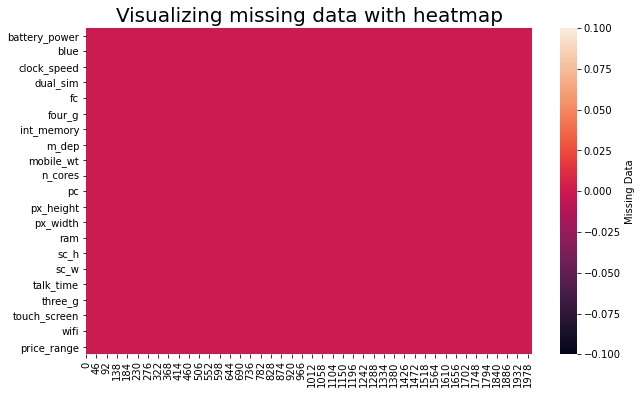

In [9]:
plt.figure(figsize=(10,6))
plt.title("Visualizing missing data with heatmap",fontsize=20)
sns.heatmap(train_data.isnull().transpose(),cbar_kws={'label': 'Missing Data'})

### Inference:
There are no null values in the dataset.

In [10]:
# To check whether there is duplicates in the dataset

train_data.duplicated().any()

False

### Inference:
There are no duplicates in the dataset.

In [11]:
# summary statistics of the numerical features.

train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


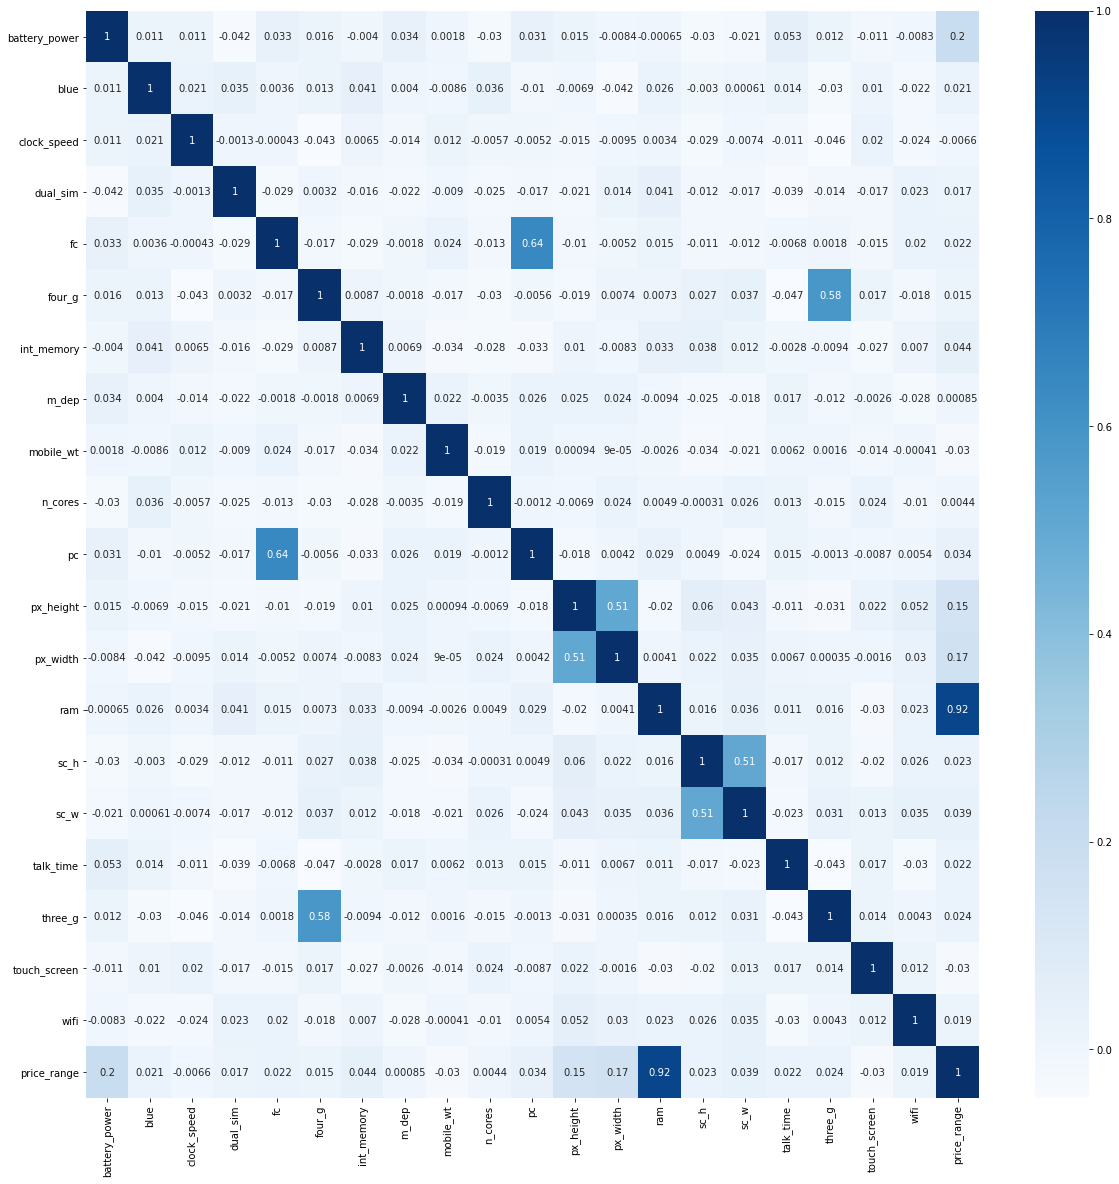

In [12]:
# To detemine the correlation between various columns in the dataset.

plt.figure(figsize=(20,20))
sns.heatmap(train_data.corr(),annot=True,cmap='Blues')
plt.savefig('Heatmap.jpg')

### Inference:
#### 1. Of all the features ram and price_range has the highest correlation of 0.92.
#### 2. 'fc' and 'pc' has a positive correlation of 0.64. That is front camera mega pixels(fc) and primary camera mega pixels(pc) have comparitively strong positive correlation.
#### 3. three_g and four_g has a comparitively strong positive correlation of 0.58.
#### 4. Also px_width and px_height has a positive correlation of about 0.51.
#### 5. ram has a very week negative correlation of -0.00065 with battery power. 
#### 6. The 'battery_power' has the second highest positive correlation with the feature 'price_range'.
#### 7.The feature 'price_range' has positive correlations with the camera quality features like 'px_height' and 'px_weight'.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



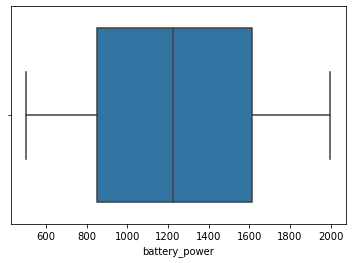

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



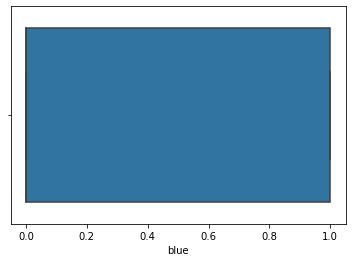

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



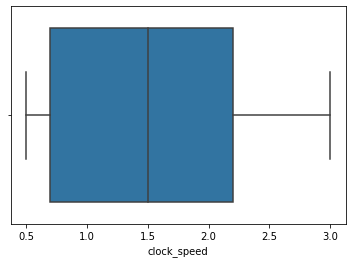

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



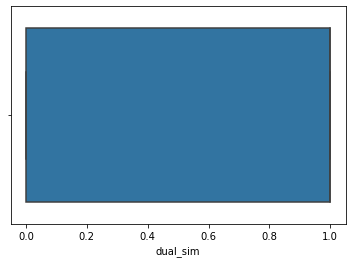

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



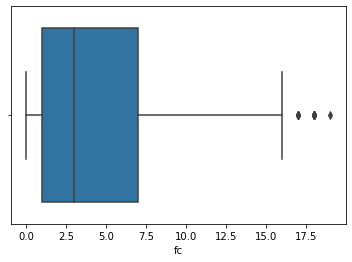

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



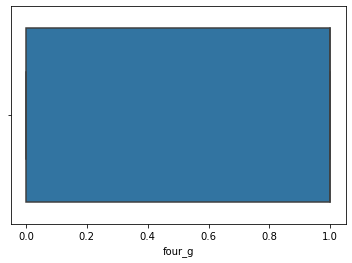

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



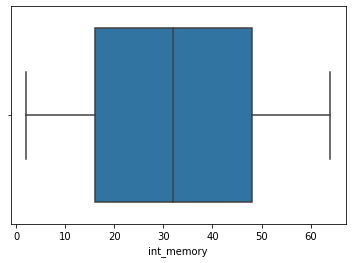

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



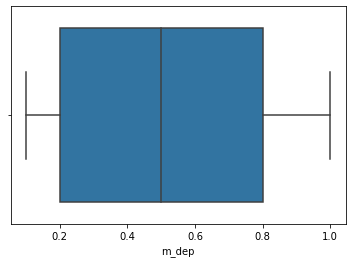

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



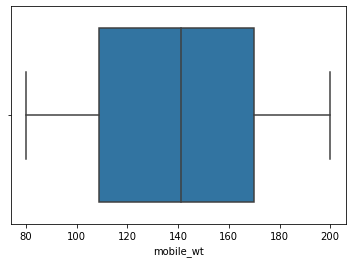

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



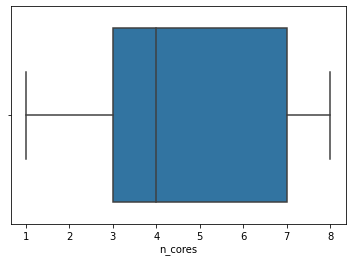

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



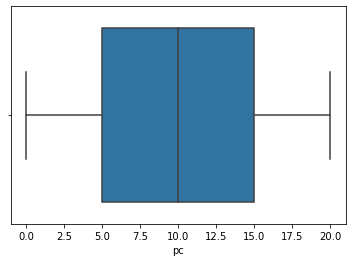

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



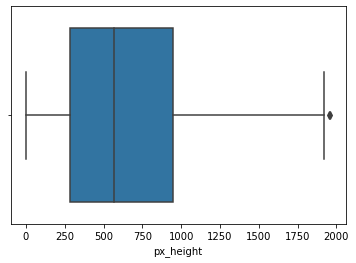

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



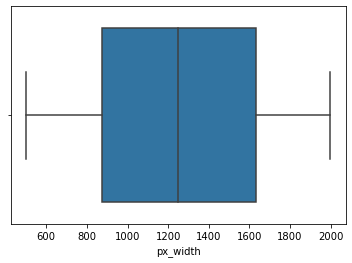

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



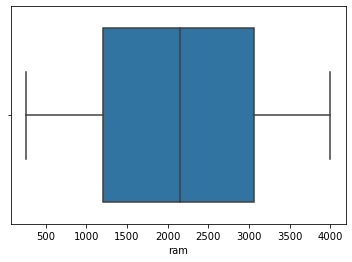

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



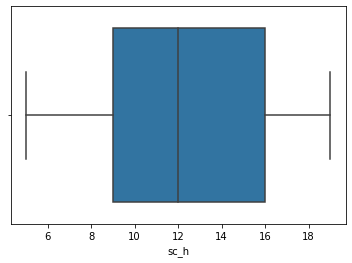

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



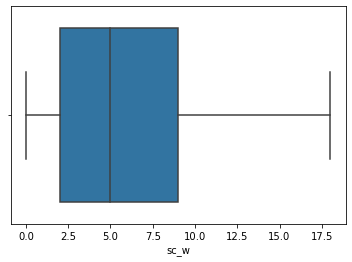

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



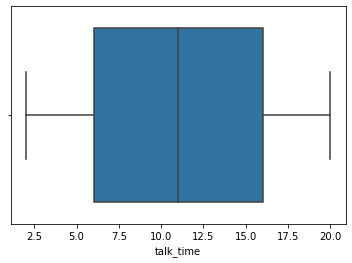

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



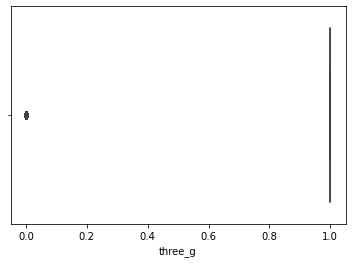

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



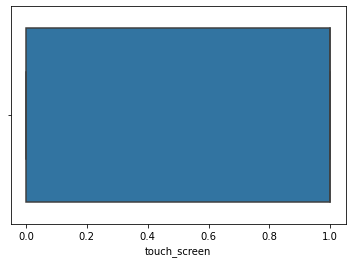

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



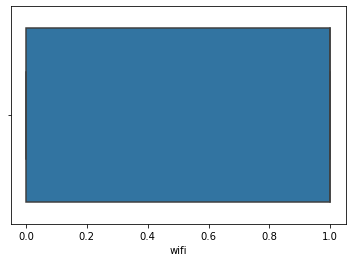

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



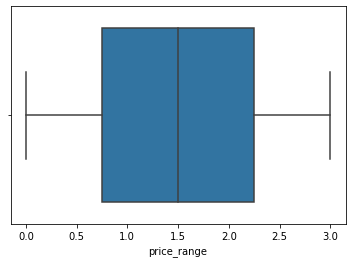

In [13]:
# To check for the outliers we use the boxplot.

for col in train_data.columns:
    sns.boxplot(train_data[col])
    plt.show()

### Inference:
From the boxplots we can identify two feature columns say 'fc' (front camera pixel) and 'px_height' (pixel resolution height) have outliers.

In [14]:
# To check the 'fc' column

x=np.percentile(train_data['fc'],99)
print(x)

train_data[train_data['fc']>x]



16.0


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
95,1137,1,1.0,0,18,0,7,1.0,196,3,...,942,1179,3616,13,5,12,1,1,1,3
169,1569,0,2.8,1,17,0,44,0.3,110,4,...,45,1942,1260,9,2,17,1,0,0,1
226,1708,1,2.4,1,18,1,49,0.1,109,1,...,233,517,3388,6,4,16,1,1,1,3
229,1689,0,1.8,0,17,0,24,0.3,127,3,...,954,1200,2766,7,2,7,0,1,1,3
300,1937,1,1.7,0,17,0,58,0.6,189,1,...,1728,1767,3321,5,4,14,1,1,0,3
305,1348,0,2.0,0,18,0,52,0.3,98,3,...,1869,1942,955,18,11,7,1,1,1,1
372,1703,1,1.5,1,17,1,55,0.7,138,5,...,1411,1711,2993,5,1,20,1,1,1,3
584,946,1,2.6,1,17,0,5,0.1,166,3,...,1698,1771,3720,15,7,4,0,1,0,3
1387,1533,1,1.1,1,18,1,17,0.3,160,4,...,1054,1393,2520,8,2,11,1,0,1,2
1406,1731,1,2.3,1,18,0,60,0.5,171,4,...,142,1039,1220,9,3,20,0,1,0,1


### Inference:
From the inspection of the data sliced using the feature column 'fc', it can be found that these values,found as outliers are relevant.Hence they are retained.


In [15]:
# To check the 'px_height' column

y=np.percentile(train_data['px_height'],99)
print(y)

train_data[train_data['px_height']>y]

1791.01


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
148,1216,0,3.0,0,4,0,47,0.4,199,3,...,1852,1967,2268,13,5,4,0,1,1,2
260,754,0,0.5,1,7,1,59,0.7,178,7,...,1914,1928,1027,6,3,5,1,0,0,1
274,793,0,1.0,1,5,1,30,0.9,133,2,...,1858,1935,2332,17,13,14,1,1,1,2
292,1995,1,1.9,0,6,0,9,0.8,139,6,...,1830,1963,1203,14,12,18,1,1,1,2
305,1348,0,2.0,0,18,0,52,0.3,98,3,...,1869,1942,955,18,11,7,1,1,1,1
443,1448,0,1.4,1,13,0,26,1.0,156,3,...,1792,1850,1175,12,9,6,0,1,0,1
520,1875,1,0.5,1,11,1,55,0.7,91,1,...,1802,1942,2712,7,2,6,1,0,1,3
770,1911,1,2.0,0,7,1,64,0.6,163,8,...,1795,1958,3872,9,8,11,1,1,0,3
873,603,1,0.7,1,0,1,64,0.2,156,6,...,1842,1968,604,10,4,8,1,1,1,0
894,1497,1,0.7,0,5,0,32,0.7,92,3,...,1920,1933,1329,6,1,7,1,1,0,2


### Inference:
From the inspection of the data sliced using the feature column 'px_height', it can be found that these values, found as outliers are relevant. Hence they are retained.

-------------------------------------------------------------------------------------------------------------------------------

### EXPLORATORY DATA ANALYSIS

#### Histogram

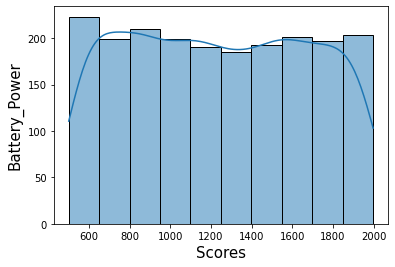

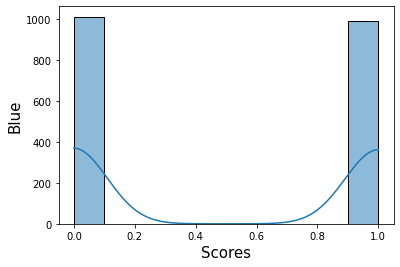

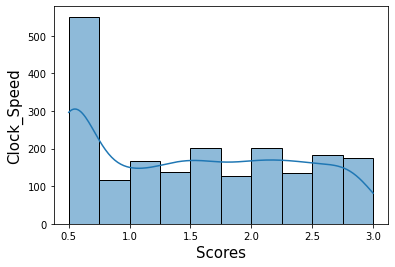

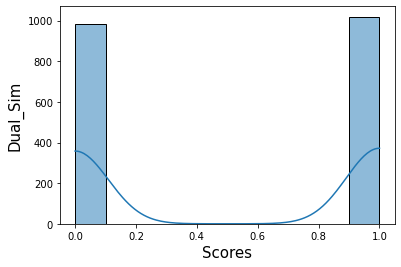

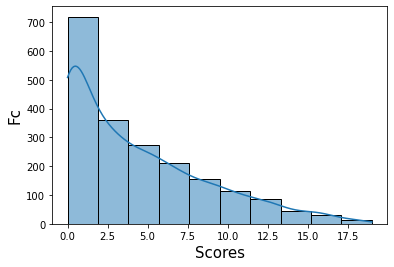

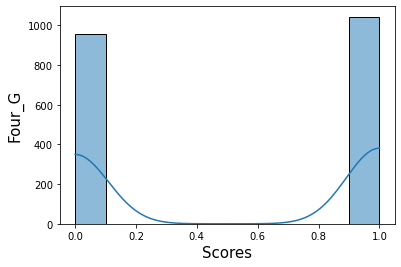

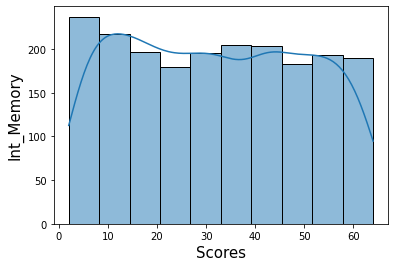

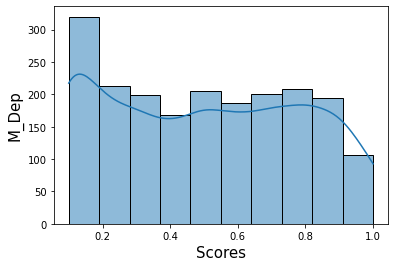

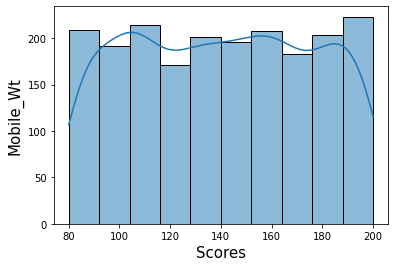

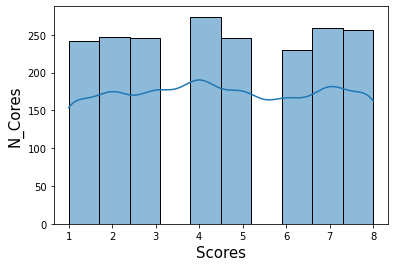

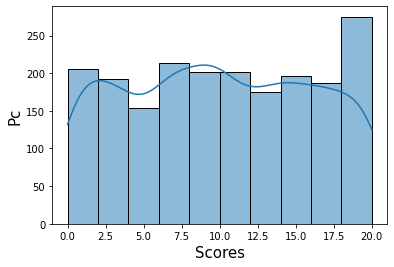

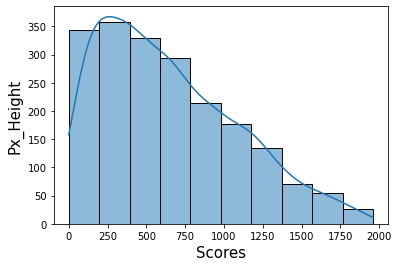

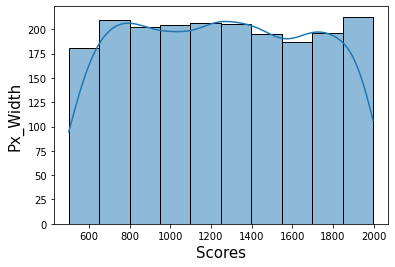

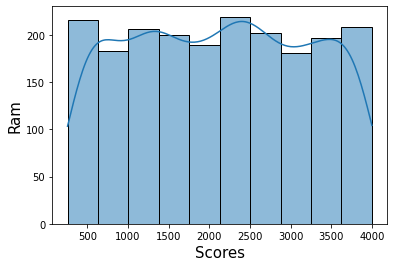

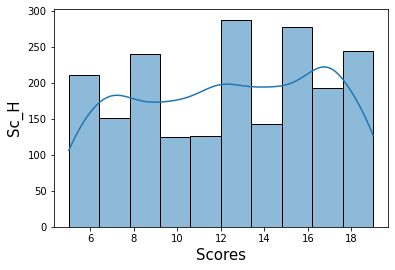

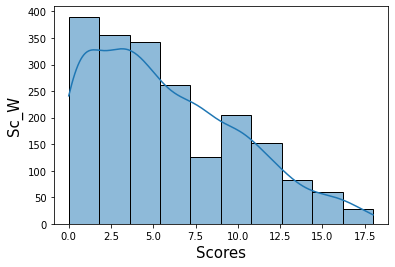

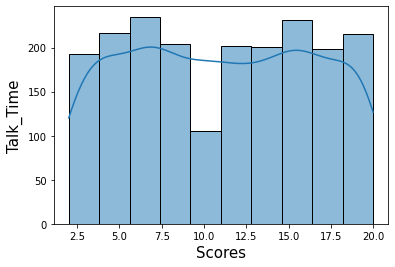

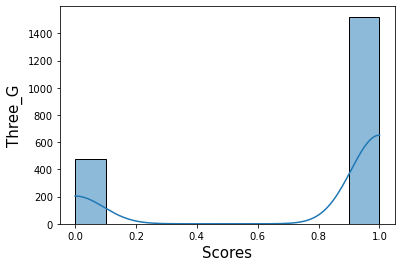

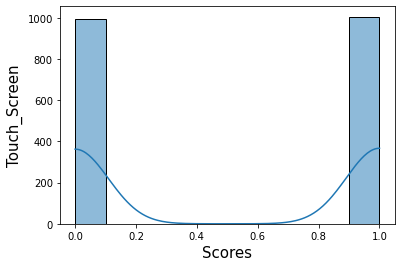

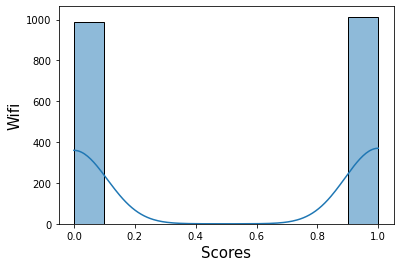

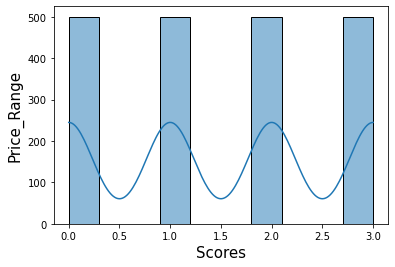

In [16]:
for col in train_data.columns:
    sns.histplot(train_data[col], kde=True, bins=10)
    plt.ylabel(col.title(),fontsize=15)
    plt.xlabel("Scores",fontsize=15)
    plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



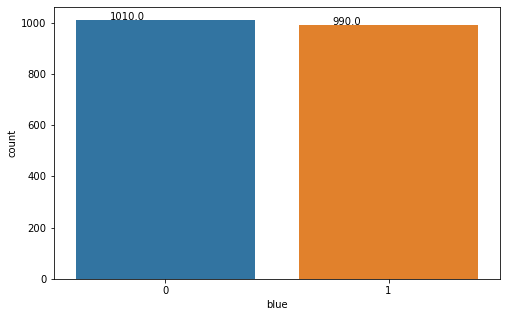

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



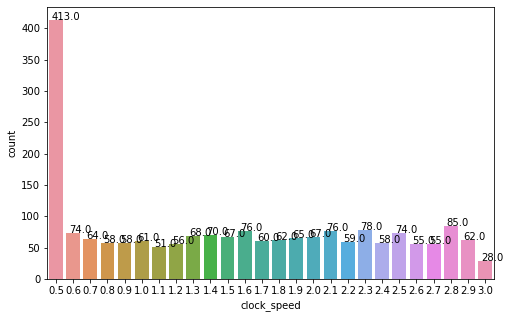

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



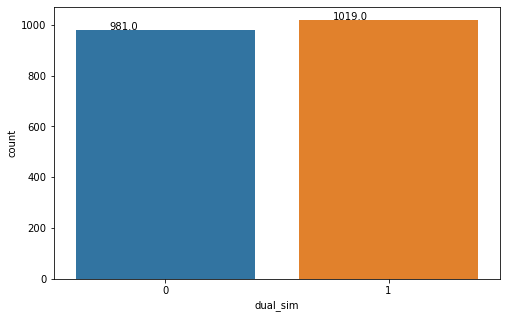

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



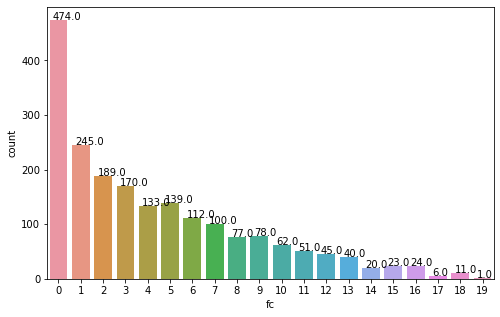

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



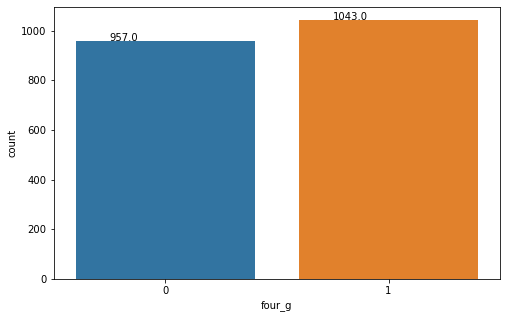

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



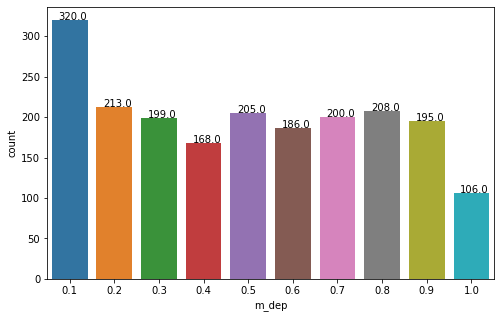

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



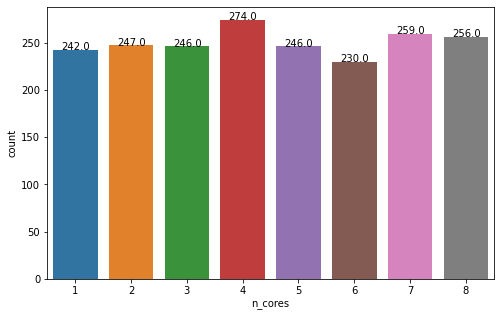

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



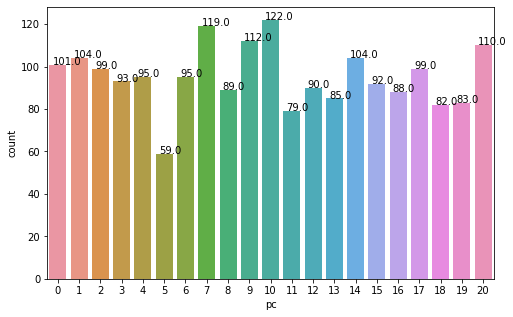

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



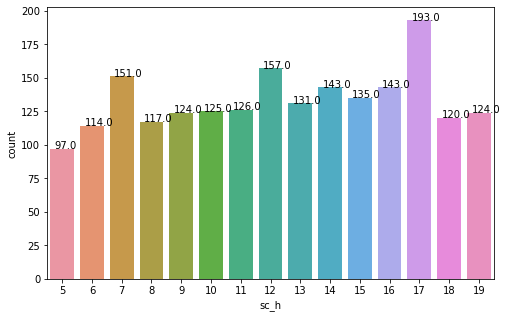

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



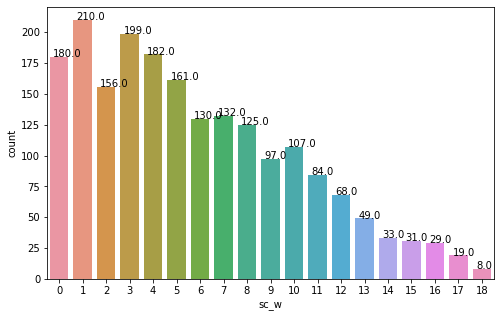

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



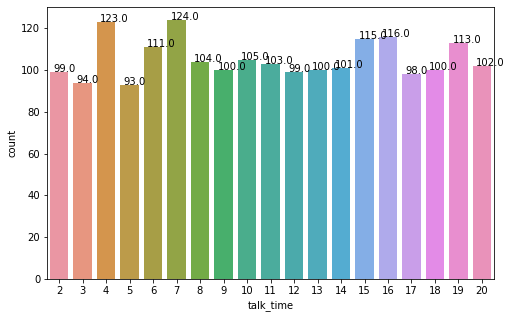

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



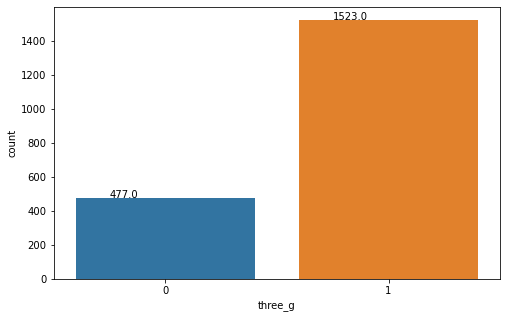

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



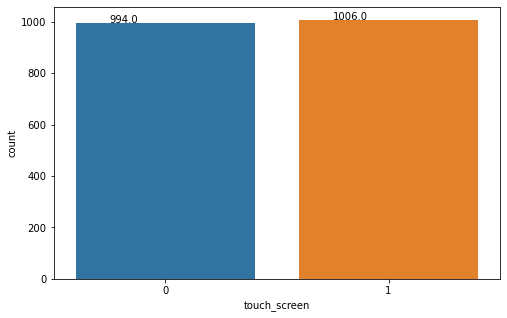

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



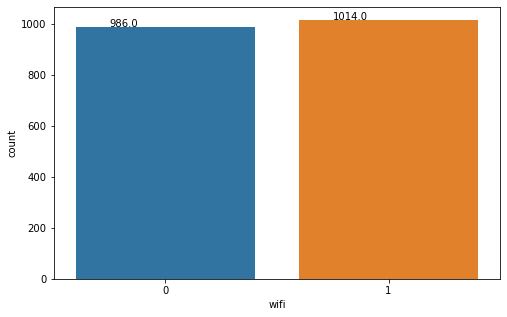

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



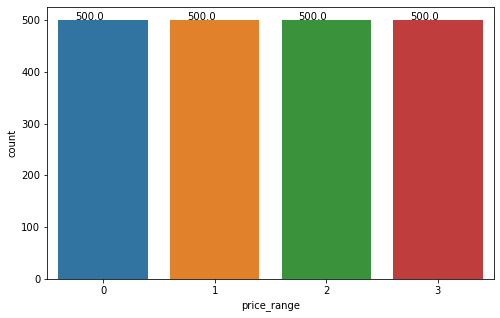

In [17]:
for col in train_data.columns:
    if train_data[col].nunique()<30:
        plt.figure(figsize=(8,5))
        plott=sns.countplot(train_data[col])
        for p in plott.patches:
            plott.annotate('{:.1f}'.format(p.get_height()),(p.get_x()+0.15,p.get_height()+0.05))
    plt.show()

Text(0, 0.5, '')

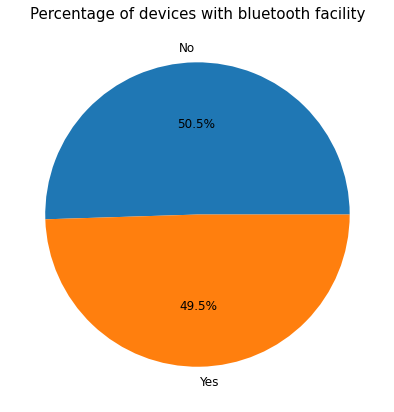

In [18]:
plt.figure(figsize=(7,7))
label=['No','Yes']
train_data['blue'].value_counts().plot(kind='pie',labels=label,autopct='%.1f%%',fontsize=12)
plt.title('Percentage of devices with bluetooth facility',fontsize=15)
plt.ylabel('')

Text(0, 0.5, '')

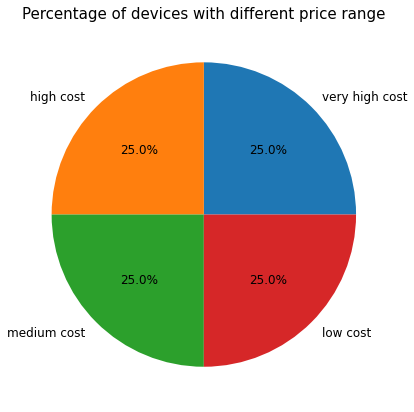

In [19]:
plt.figure(figsize=(7,7))
label=['very high cost','high cost','medium cost','low cost']
train_data['price_range'].value_counts().plot(kind='pie',labels=label,autopct='%.1f%%',fontsize=12)
plt.title('Percentage of devices with different price range',fontsize=15)
plt.ylabel('')

Text(0, 0.5, '')

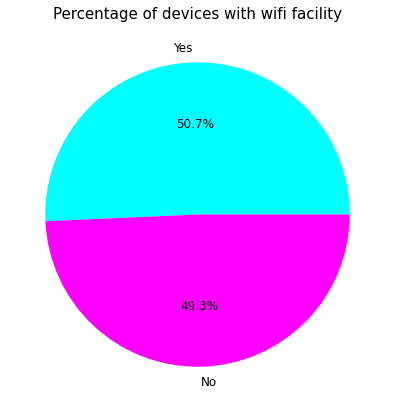

In [20]:
plt.figure(figsize=(7,7))
label=['Yes','No']
colors=['cyan','magenta']
train_data['wifi'].value_counts().plot(kind='pie',labels=label,colors=colors,autopct='%.1f%%',fontsize=12)
plt.title('Percentage of devices with wifi facility',fontsize=15)
plt.ylabel('')

Text(0, 0.5, '')

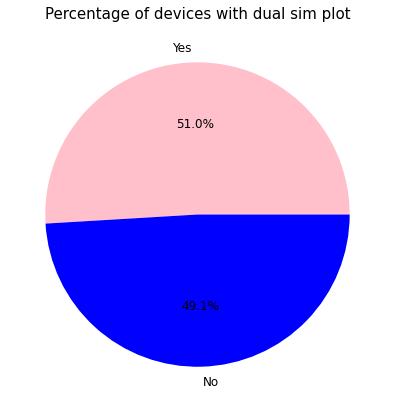

In [21]:
plt.figure(figsize=(7,7))
label=['Yes','No']
colors=['pink','blue']
train_data['dual_sim'].value_counts().plot(kind='pie',labels=label,colors=colors,autopct='%.1f%%',fontsize=12)
plt.title('Percentage of devices with dual sim plot',fontsize=15)
plt.ylabel('')

Text(0, 0.5, '')

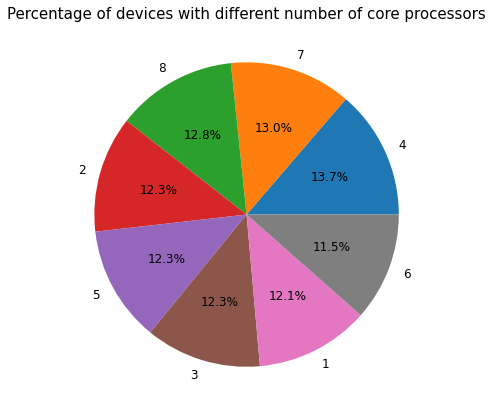

In [22]:
plt.figure(figsize=(7,7))
train_data['n_cores'].value_counts().plot(kind='pie',autopct='%.1f%%',fontsize=12)
plt.title('Percentage of devices with different number of core processors',fontsize=15)
plt.ylabel('')

Text(0, 0.5, '')

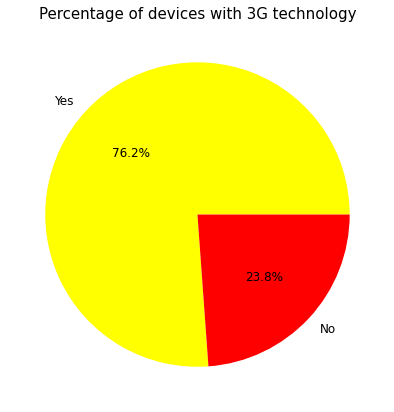

In [23]:
plt.figure(figsize=(7,7))
label=['Yes','No']
colors=['yellow','red']
train_data['three_g'].value_counts().plot(kind='pie',labels=label,colors=colors,autopct='%.1f%%',fontsize=12)
plt.title('Percentage of devices with 3G technology',fontsize=15)
plt.ylabel('')

Text(0, 0.5, '')

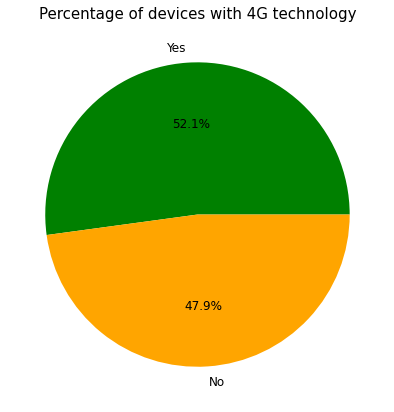

In [24]:
plt.figure(figsize=(7,7))
label=['Yes','No']
colors=['green','orange']
train_data['four_g'].value_counts().plot(kind='pie',labels=label,colors=colors,autopct='%.1f%%',fontsize=12)
plt.title('Percentage of devices with 4G technology',fontsize=15)
plt.ylabel('')

Text(0, 0.5, '')

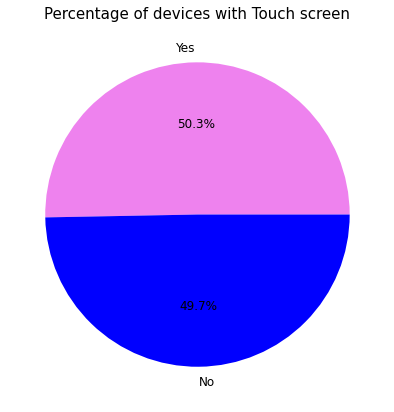

In [25]:
plt.figure(figsize=(7,7))
label=['Yes','No']
colors=['violet','blue']
train_data['touch_screen'].value_counts().plot(kind='pie',labels=label,colors=colors,autopct='%.1f%%',fontsize=12)
plt.title('Percentage of devices with Touch screen',fontsize=15)
plt.ylabel('')

-------------------------------------------------------------------------------------------------------------------------------

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='battery_power', ylabel='ram'>

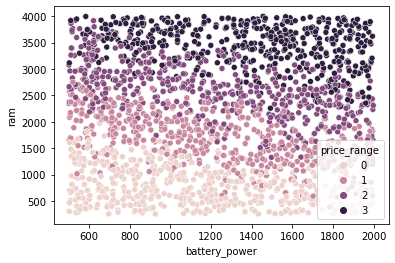

In [26]:
sns.scatterplot('battery_power','ram',data=train_data,hue='price_range')

### Inference
* From the above scatterplot we can infer  that ram directly influence the price range. Price range increases with the level of ram.
* No such inflence is seen with the battery power. All ranges of battery power are found in all the price ranges in the given data.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='n_cores', ylabel='ram'>

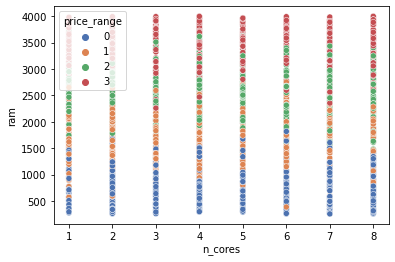

In [27]:
sns.scatterplot('n_cores','ram',data=train_data,hue='price_range',palette='deep')

### Inference
From the above scatterplot we can infer that all the price ranges contains phones with all the different number of core processors.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='int_memory', ylabel='ram'>

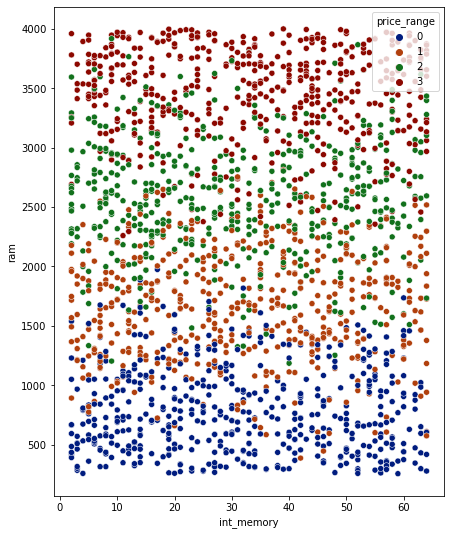

In [28]:
plt.figure(figsize=(7,9))
sns.scatterplot('int_memory','ram',hue='price_range',data=train_data,palette='dark')

### Inference
* Clearly increase in 'ram' increases the 'price_range'.
* But all levels of internal memory of the phones are available in all the price ranges.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='fc', ylabel='pc'>

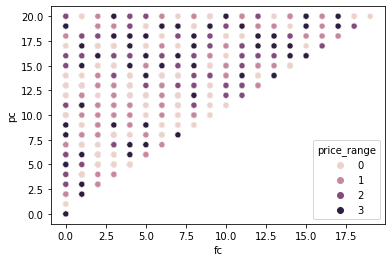

In [29]:
sns.scatterplot('fc','pc',hue='price_range',data=train_data)

### Inference
No special relation is seen in the scatterplot (bivariate distribution) of features 'fc' and 'pc' in connection to the different price ranges. In all the price ranges different ranges of values of 'fc' and 'pc' are seen.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='px_height', ylabel='px_width'>

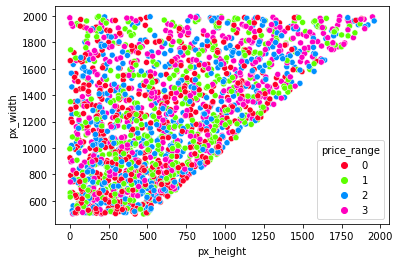

In [30]:
sns.scatterplot('px_height','px_width',hue='price_range',data=train_data,palette='gist_rainbow')

### Inference
No special relation is seen in the scatterplot (bivariate distribution) of features 'px_height' and 'px_width' in connection to the different price ranges. In all the price ranges different ranges of values of 'px_height' and 'px_width' values are seen.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='sc_h', ylabel='sc_w'>

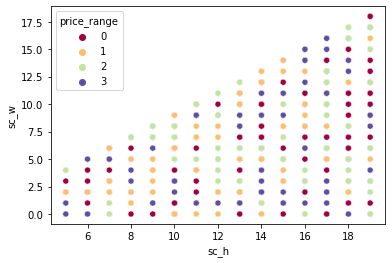

In [31]:
sns.scatterplot('sc_h','sc_w',hue='price_range',data=train_data,palette='Spectral')

### Inference
No special relation is seen in the scatterplot (bivariate distribution) of features, 'sc_h'(screen height) and 'sc_w'(screen width) in connection to the different price ranges. In all the price ranges different ranges of values of 'sc_h' and 'sc_w' values are seen.

-----------------------------------------------------------------------------------------------------------------------------

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

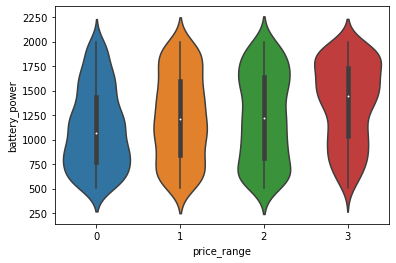

In [32]:
sns.violinplot('price_range','battery_power',data=train_data)

### Inference
The above plot shows the distribution of values of battery power across all price ranges.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='price_range', ylabel='ram'>

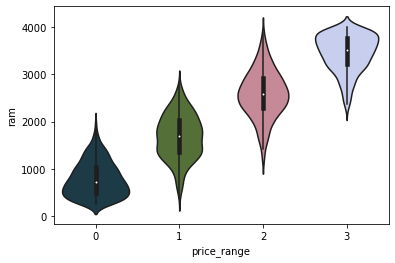

In [33]:
sns.violinplot('price_range','ram',data=train_data,palette='cubehelix')

### Inference
* The above plot shows the distribution of values of ram across all price ranges.
* Clearly the density distribution of values of ram for the highest price range is higher.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='price_range', ylabel='int_memory'>

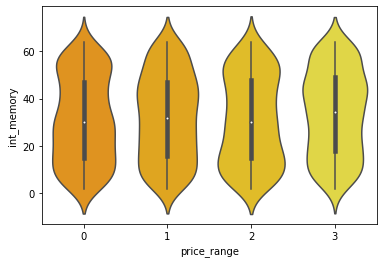

In [34]:
sns.violinplot('price_range','int_memory',palette='Wistia_r',data=train_data)

### Inference
The above plot shows the distribution of values of internal memory across all price ranges.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='price_range', ylabel='talk_time'>

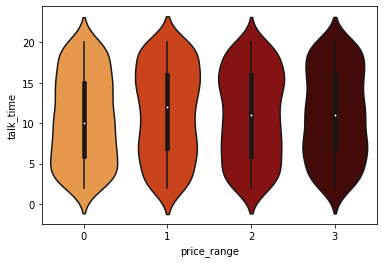

In [35]:
sns.violinplot('price_range','talk_time',palette='gist_heat_r',data=train_data)

### Inference
The above plot shows the distribution of values of talk time across all price ranges.No specific distribution can be found from the kernel density estimation of the plot.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='price_range', ylabel='mobile_wt'>

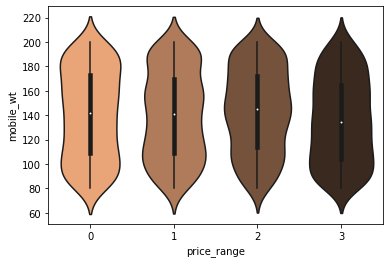

In [36]:
sns.violinplot('price_range','mobile_wt',palette='copper_r',data=train_data)

### Inference
The above plot shows the distribution of values of mobile weight across all price ranges.No specific distribution can be found from the kernel density estimation of the plot.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='price_range', ylabel='m_dep'>

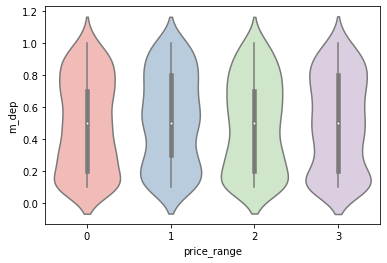

In [37]:
sns.violinplot('price_range','m_dep',palette='Pastel1',data=train_data)

### Inference
The above plot shows the distribution of values of mobile depth across all price ranges.No specific distribution can be found from the kernel density estimation of the plot.

-------------------------------------------------------------------------------------------------------------------------------

### Number of core processors vs Price

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'count')

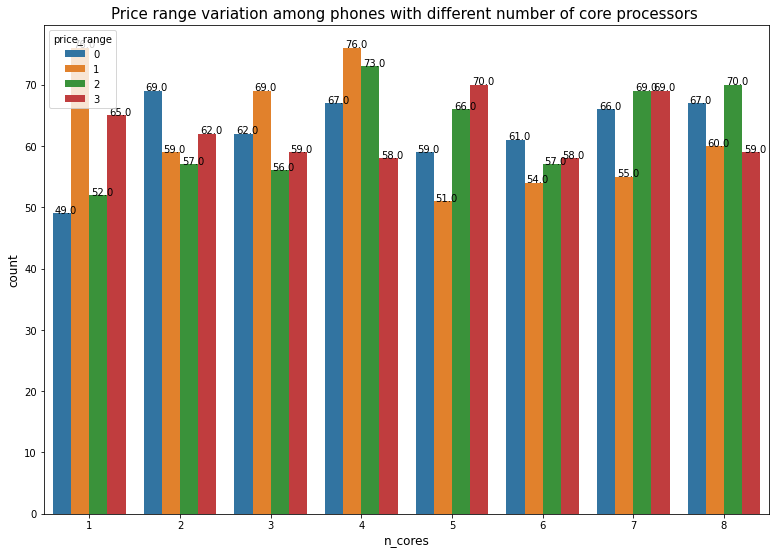

In [38]:
plt.figure(figsize=(13,9))
plot1=sns.countplot('n_cores',hue='price_range',data=train_data)
for p in plot1.patches:
            plot1.annotate('{:.1f}'.format(p.get_height()),(p.get_x()+0.02,p.get_height()+0.01))
plt.title('Price range variation among phones with different number of core processors ',fontsize=15)
plt.xlabel('n_cores',fontsize=12)
plt.ylabel('count',fontsize=12)

### Inference
All the price ranges are seen in the phones of different companies in the dataset with different number of core processors.

### Bluetooth vs price

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

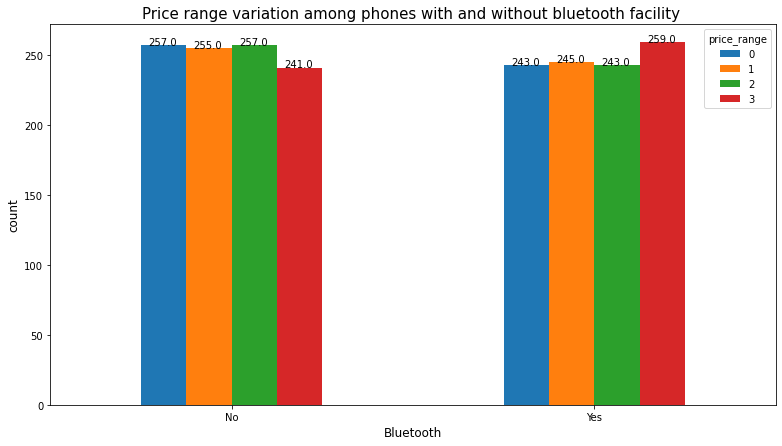

In [39]:
plot2=pd.crosstab(train_data['blue'],train_data['price_range']).plot(kind='bar',figsize=(13,7))
for p in plot2.patches:
            plot2.annotate('{:.1f}'.format(p.get_height()),(p.get_x()+0.02,p.get_height()+0.01))
plt.title('Price range variation among phones with and without bluetooth facility ',fontsize=15)
plot2.set_xticklabels(['No','Yes'],fontsize=10)
plt.xlabel('Bluetooth',fontsize=12)
plt.ylabel('count',fontsize=12)
plt.xticks(rotation=0)

### Inference
All the price ranges are seen in the phones of different companies in the dataset with or without bluetooth.

### WIFI vs Price 

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

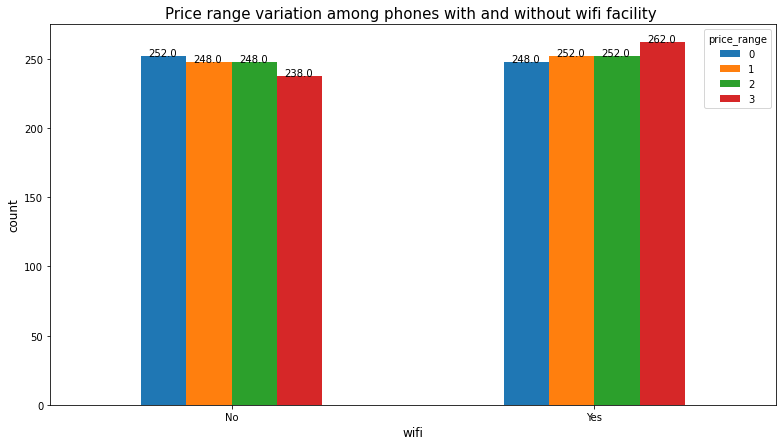

In [40]:
plot3=pd.crosstab(train_data['wifi'],train_data['price_range']).plot(kind='bar',figsize=(13,7))
for p in plot3.patches:
            plot3.annotate('{:.1f}'.format(p.get_height()),(p.get_x()+0.02,p.get_height()+0.01))
plt.title('Price range variation among phones with and without wifi facility ',fontsize=15)
plt.xlabel('wifi',fontsize=12)
plt.ylabel('count',fontsize=12)
plot3.set_xticklabels(['No','Yes'])
plt.xticks(rotation=0)

### Inference
All the price ranges are seen in the phones of different companies in the dataset with or without WIFI facility.

### 3G vs Price

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

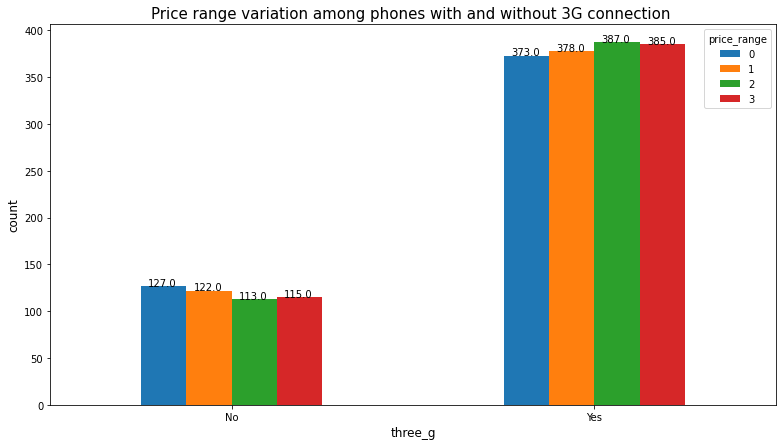

In [41]:
plot4=pd.crosstab(train_data['three_g'],train_data['price_range']).plot(kind='bar',figsize=(13,7))
for p in plot4.patches:
            plot4.annotate('{:.1f}'.format(p.get_height()),(p.get_x()+0.02,p.get_height()+0.01))
plt.title('Price range variation among phones with and without 3G connection ',fontsize=15)
plt.xlabel('three_g',fontsize=12)
plt.ylabel('count',fontsize=12)
plot4.set_xticklabels(['No','Yes'])
plt.xticks(rotation=0)

### Inference
All the price ranges are seen in the phones of different companies in the dataset with or without 3G connection.

### 4G vs Price

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

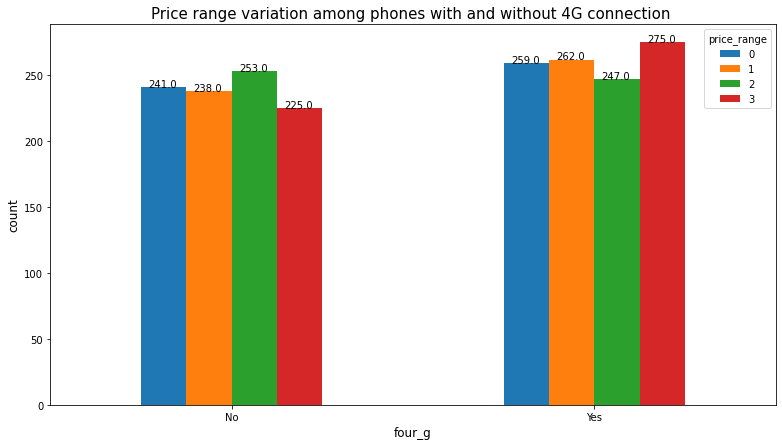

In [42]:
plot5=pd.crosstab(train_data['four_g'],train_data['price_range']).plot(kind='bar',figsize=(13,7))
for p in plot5.patches:
            plot5.annotate('{:.1f}'.format(p.get_height()),(p.get_x()+0.02,p.get_height()+0.01))
plt.title('Price range variation among phones with and without 4G connection ',fontsize=15)
plt.xlabel('four_g',fontsize=12)
plt.ylabel('count',fontsize=12)
plot5.set_xticklabels(['No','Yes'])
plt.xticks(rotation=0)

### Inference
All the price ranges are seen in the phones of different companies in the dataset with or without 4G connection.

### Dual sim vs Price

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

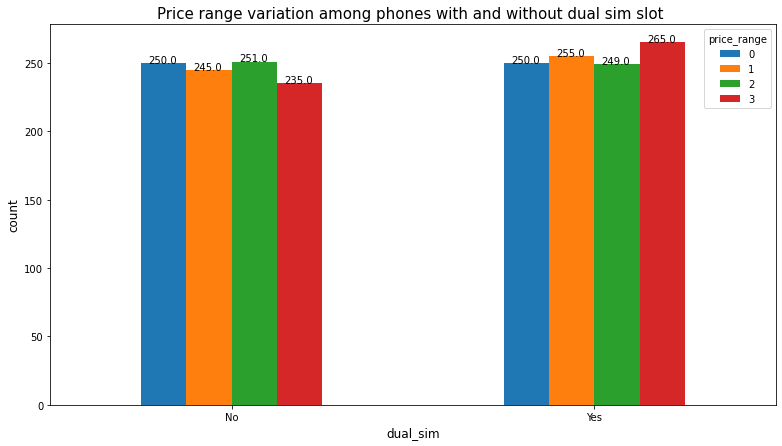

In [43]:
plot6=pd.crosstab(train_data['dual_sim'],train_data['price_range']).plot(kind='bar',figsize=(13,7))
for p in plot6.patches:
            plot6.annotate('{:.1f}'.format(p.get_height()),(p.get_x()+0.02,p.get_height()+0.01))
plt.title('Price range variation among phones with and without dual sim slot ',fontsize=15)
plt.xlabel('dual_sim',fontsize=12)
plt.ylabel('count',fontsize=12)
plot6.set_xticklabels(['No','Yes'])
plt.xticks(rotation=0)

### Inference
All the price ranges are seen in the phones of different companies in the dataset with or without dual sim slot.

### Touch screen vs Price

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

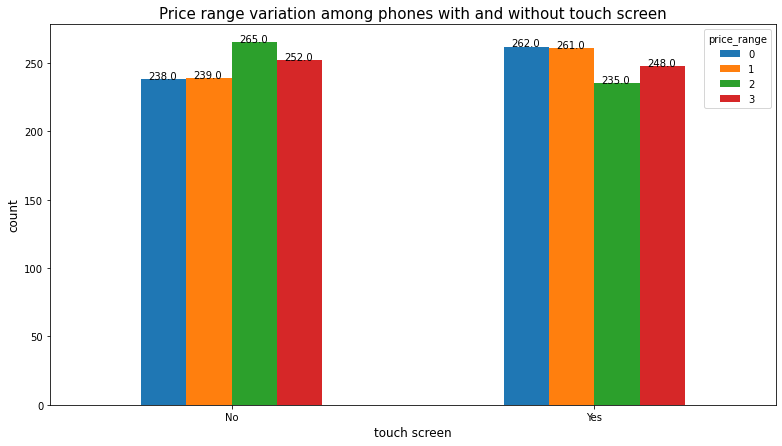

In [44]:
plot7=pd.crosstab(train_data['touch_screen'],train_data['price_range']).plot(kind='bar',figsize=(13,7))
for p in plot7.patches:
            plot7.annotate('{:.1f}'.format(p.get_height()),(p.get_x()+0.02,p.get_height()+0.01))
plt.title('Price range variation among phones with and without touch screen',fontsize=15)
plt.xlabel('touch screen',fontsize=12)
plt.ylabel('count',fontsize=12)
plot7.set_xticklabels(['No','Yes'])
plt.xticks(rotation=0)

### Inference
All the price ranges are seen in the phones of different companies in the dataset with or without touch screen.

-------------------------------------------------------------------------------------------------------------------------------

### RANKING THE DATASET

In [45]:
# Copying the original dataset for ranking
rank_data=train_data.copy()

In [46]:
# Separating the columns as per the need

col=['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g','int_memory', 'm_dep','n_cores', 'pc', 'px_height','px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']

In [47]:
# Ranking the chosen columns in the descending order

rank_data[col]=rank_data[col].rank(ascending=False,pct=True)

In [48]:
# Ranking the column 'mobile_wt' in ascending order

rank_data['mobile_wt']=rank_data['mobile_wt'].rank(pct=True)

In [49]:
# Ranking the column 'mobile_wt' in ascending order

rank_data['mobile_wt']=rank_data['mobile_wt'].rank(pct=True)

In [50]:
# Ranking the column price_range using the method-average

rank_data['price_range']=rank_data['price_range'].rank()

In [51]:
rank_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0.75625,0.74775,0.26250,0.755,0.70200,0.761,0.91025,0.40125,0.89175,0.81750,...,0.98625,0.83225,0.38125,0.72975,0.35825,0.07950,0.881,0.75175,0.25375,750.5
1,0.63925,0.24775,0.89700,0.255,0.88175,0.261,0.16725,0.30475,0.46625,0.69425,...,0.27275,0.00850,0.35700,0.17050,0.67750,0.70925,0.381,0.25175,0.75375,1250.5
2,0.95475,0.24775,0.89700,0.255,0.59350,0.261,0.36000,0.10200,0.53450,0.43425,...,0.10600,0.19325,0.36600,0.60475,0.76625,0.60125,0.381,0.25175,0.75375,1250.5
3,0.91500,0.24775,0.16125,0.755,0.88175,0.761,0.85525,0.20275,0.42300,0.31525,...,0.12500,0.14350,0.31950,0.25450,0.29400,0.49800,0.381,0.75175,0.75375,1250.5
4,0.12100,0.24775,0.59675,0.755,0.05275,0.261,0.30950,0.40125,0.50300,0.81750,...,0.13075,0.52700,0.68750,0.79000,0.76625,0.29350,0.381,0.25175,0.75375,750.5


In [52]:
rank_data.sort_values(by='price_range')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1838,0.84025,0.24775,0.68125,0.255,0.07400,0.261,0.78450,0.20275,0.70725,0.56425,...,0.67175,0.51150,0.77775,0.39350,0.35825,0.92725,0.381,0.25175,0.75375,250.5
1762,0.78275,0.24775,0.89700,0.255,0.50375,0.761,0.27475,0.49900,0.21800,0.06425,...,0.90600,0.97800,0.77950,0.32400,0.49650,0.55000,0.381,0.75175,0.25375,250.5
419,0.70600,0.24775,0.68125,0.755,0.59350,0.761,0.96175,0.20275,0.16275,0.81750,...,0.83575,0.33000,0.84750,0.60475,0.35825,0.81900,0.381,0.25175,0.75375,250.5
846,0.33875,0.74775,0.19425,0.255,0.20000,0.761,0.49500,0.40125,0.99550,0.93975,...,0.85650,0.79650,0.85450,0.85700,0.42375,0.65225,0.881,0.75175,0.75375,250.5
845,0.06300,0.74775,0.33200,0.755,0.05275,0.761,0.13700,0.10200,0.21800,0.19300,...,0.38475,0.31900,0.99250,0.39350,0.58225,0.18225,0.381,0.75175,0.25375,250.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,0.62400,0.24775,0.06650,0.255,0.88175,0.261,0.08625,0.78700,0.16275,0.06425,...,0.77300,0.63650,0.04100,0.17050,0.10175,0.60125,0.381,0.25175,0.25375,1750.5
982,0.63175,0.74775,0.77525,0.255,0.59350,0.261,0.30950,0.49900,0.15450,0.69425,...,0.79075,0.03200,0.13450,0.39350,0.49650,0.44750,0.381,0.25175,0.75375,1750.5
987,0.20900,0.74775,0.16125,0.755,0.88175,0.261,0.66575,0.78700,0.74800,0.19300,...,0.43350,0.75975,0.00350,0.17050,0.05200,0.65225,0.381,0.25175,0.25375,1750.5
956,0.74275,0.74775,0.22825,0.755,0.16125,0.261,0.92950,0.92025,0.23625,0.06425,...,0.31500,0.01750,0.14875,0.72975,0.58225,0.60125,0.381,0.25175,0.25375,1750.5


### Thus we have ranked the features of the dataset.

-------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------